# **LSTM Exercise**

## Import libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [43]:
tf.random.set_seed(7)

In [44]:
dataframe = pd.read_csv('traffic.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

## Normalize the dataset

In [45]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split into train and test sets

In [46]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

32240 15880


In [47]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [49]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


## Fit the LSTM

In [50]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1008/1008 - 4s - 4ms/step - loss: 0.0057
Epoch 2/50
1008/1008 - 3s - 3ms/step - loss: 7.3260e-04
Epoch 3/50
1008/1008 - 3s - 3ms/step - loss: 7.3058e-04
Epoch 4/50
1008/1008 - 3s - 3ms/step - loss: 7.2897e-04
Epoch 5/50
1008/1008 - 5s - 5ms/step - loss: 7.2798e-04
Epoch 6/50
1008/1008 - 3s - 3ms/step - loss: 7.2750e-04
Epoch 7/50
1008/1008 - 4s - 4ms/step - loss: 7.2731e-04
Epoch 8/50
1008/1008 - 3s - 3ms/step - loss: 7.2723e-04
Epoch 9/50
1008/1008 - 5s - 5ms/step - loss: 7.2719e-04
Epoch 10/50
1008/1008 - 5s - 5ms/step - loss: 7.2717e-04
Epoch 11/50
1008/1008 - 5s - 5ms/step - loss: 7.2715e-04
Epoch 12/50
1008/1008 - 6s - 6ms/step - loss: 7.2713e-04
Epoch 13/50
1008/1008 - 4s - 4ms/step - loss: 7.2711e-04
Epoch 14/50
1008/1008 - 3s - 3ms/step - loss: 7.2709e-04
Epoch 15/50
1008/1008 - 3s - 3ms/step - loss: 7.2707e-04
Epoch 16/50
1008/1008 - 5s - 5ms/step - loss: 7.2704e-04
Epoch 17/50
1008/1008 - 3s - 3ms/step - loss: 7.2702e-04
Epoch 18/50
1008/1008 - 3s - 3ms/step - loss: 7.2700e-0

## Make preductuion and evaluatuin matrix.

In [51]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train Score: 4.82 RMSE
Test Score: 5.49 RMSE


## Visualize the result

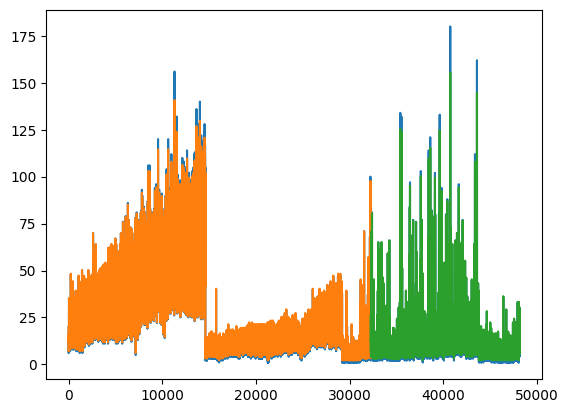

In [52]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **Well done** :)